# author: Priyanka Meratwal
# task 7:Stock Market Prediction using Numerical and Textual Analysis

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.704819
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.358185
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.538239
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.121498
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.293579


Exploring Rolling Mean and Return Rate of Stocks¶

Rolling Mean
Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.


In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
2010-02-01   NaN
Name: Adj Close, dtype: float64

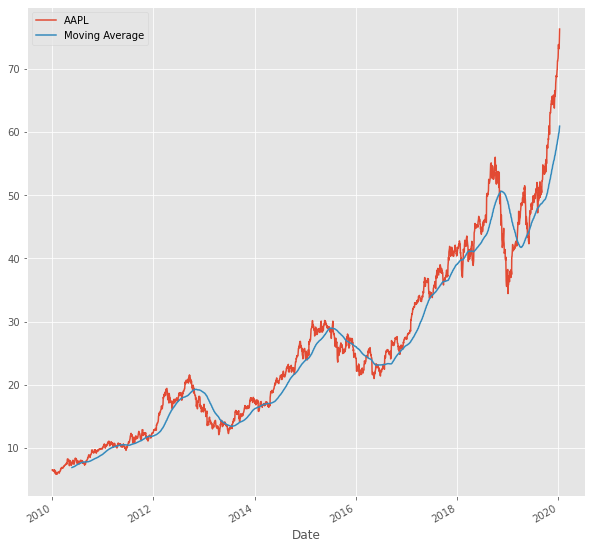

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='Moving Average')
plt.legend()
plt.show()

Return Deviation — For the determination risk and return
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

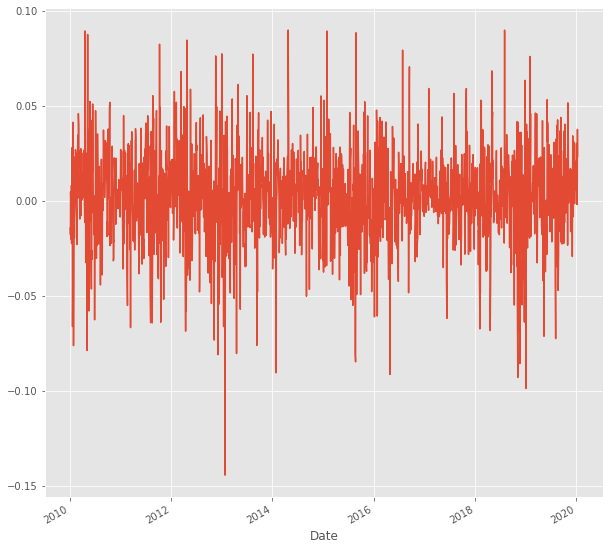

In [6]:
rets = close_px / close_px.shift(2) - 1
rets.plot(label='return')
plt.show()


# Analysing Competitors Stocks¶

In [7]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,6.539882,10.840267,312.204773,92.163887,24.105360
2010-01-05,6.551187,10.896401,310.829926,91.050545,24.113148
2010-01-06,6.446983,10.840267,302.994293,90.459076,23.965164
2010-01-07,6.435065,11.401575,295.940735,90.145927,23.715933
2010-01-08,6.477847,11.647147,299.885956,91.050545,23.879499



# Analysis of Correlations (Dependency on one another)
We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

In [8]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014106,0.003578,-0.005741,-0.002145,0.009312
2010-01-14,-0.005792,-0.007724,0.004701,0.015972,0.020099


([<matplotlib.axis.YTick at 0x1e0632f8>,
 [Text(0, 0, 'AAPL'),
  Text(0, 1, 'GE'),
  Text(0, 2, 'GOOG'),
  Text(0, 3, 'IBM'),
  Text(0, 4, 'MSFT')])

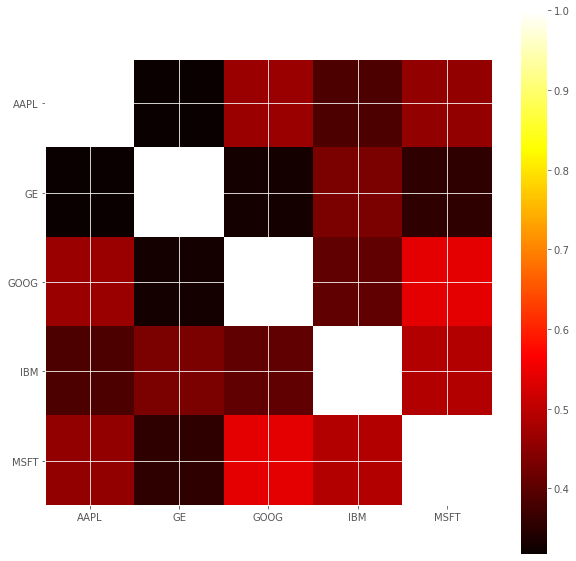

In [9]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

# Returns rate of Stock and Risk
Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk)

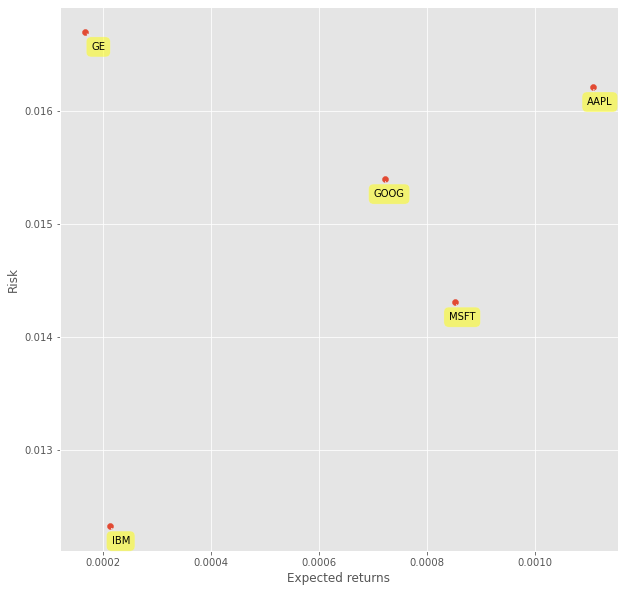

In [12]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Loading News data in textual form.

In [13]:
df1 = pd.read_csv('india-news-headlines.csv')
df1 = df1.iloc[0:10000]
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [14]:
df1.tail(10)

,publish_date,headline_category,headline_text
9990,20010727,business.india-business,UTI to be split?
9991,20010727,unknown,Putin; Jiang talk Bush-Putin summit over hotline
9992,20010727,unknown,Phoolan's village wants ticket for her kin
9993,20010727,entertainment.english.hollywood,McCartney and girlfriend Heather Mills to marry
9994,20010727,entertainment.hindi.bollywood,Rachel Shelley has first 15 minutes of fame
9995,20010727,business.india-business,For Sensex; worst is yet to come
9996,20010727,city.bengaluru,Dilemma: To charge somebody with corruption or...
9997,20010727,unknown,UP Govt was awaiting Phoolan's nod for commando
9998,20010727,unknown,Phoolan's decade in Gwalior Jail changed her
9999,20010727,city.bengaluru,Implement Kannada or else; DC warns officials


# Information of dataset

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       10000 non-null  int64 
 1   headline_category  10000 non-null  object
 2   headline_text      10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 156.3+ KB


# Description of Dataset


In [16]:

df1.describe()

,publish_date
count,1.000000e+04
mean,2.001050e+07
std,2.169321e+02
min,2.001010e+07
25%,2.001032e+07
50%,2.001053e+07
75%,2.001072e+07
max,2.001073e+07


In [17]:

df1.max()

publish_date                                                  20010727
headline_category                                              unknown
headline_text        win over cena satisfying but defeating underta...
dtype: object

In [18]:

df1['headline_text'].unique()

array(['win over cena satisfying but defeating undertaker bigger roman reigns',
       'Status quo will not be disturbed at Ayodhya; says Vajpayee',
       'Fissures in Hurriyat over Pak visit', ...,
       "UP Govt was awaiting Phoolan's nod for commando",
       "Phoolan's decade in Gwalior Jail changed her",
       'Implement Kannada or else; DC warns officials'], dtype=object)

In [19]:
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

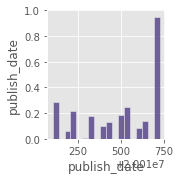

In [20]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [21]:
df1['headline_text'].value_counts()

Bush names Lindsey top economic aide                8
Light combat craft takes India into club class      7
Bangla Oppn leader issues 'fatwa' against judges    5
Indian American boy confesses to parents' murder    5
Feroz Shah to repeat Kartoos?                       4
                                                   ..
DGP's verdict: SP is good; IG not bad               1
Students seek postponement of engg exams            1
Families Mean Business                              1
Rajnath denies SP's charges on Phoolan's murder     1
Stray dogs in city are above 2 lakh                 1
Name: headline_text, Length: 8873, dtype: int64

# EDA using NLP & NLTK tools


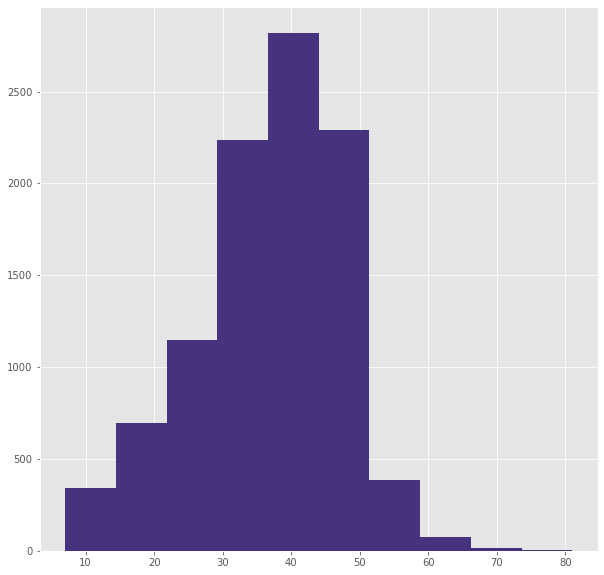

In [22]:

df1['headline_text'].str.len().hist()
plt.show()

The histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters. Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each news headline.

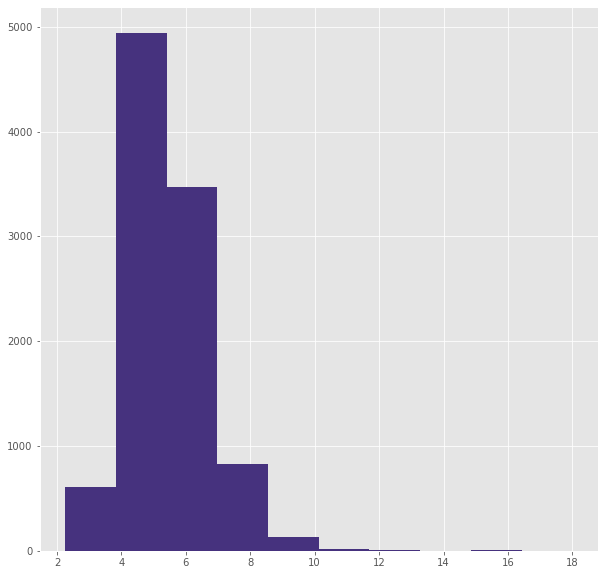

In [23]:
df1['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

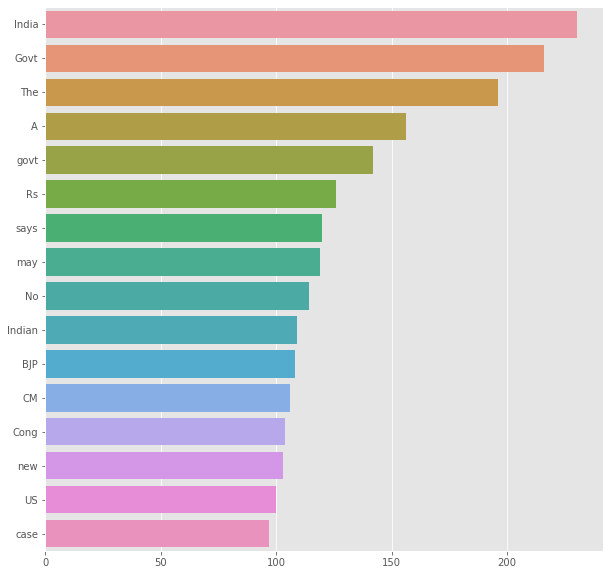

In [26]:

from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

# Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc. If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on. Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.


In [27]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

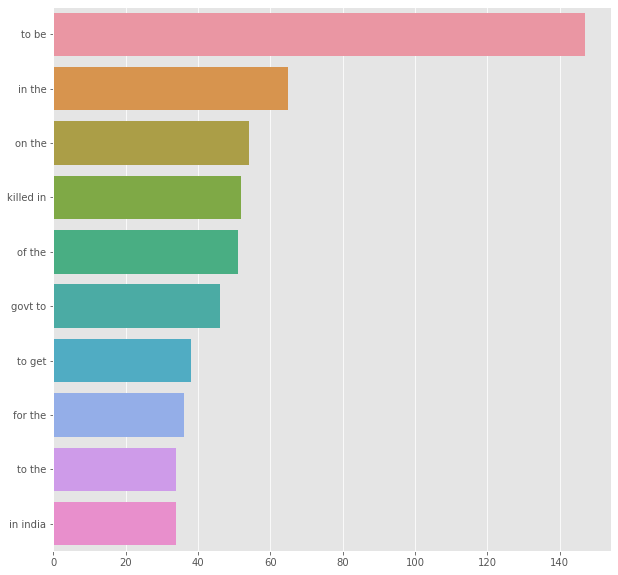

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

# Using Textblob



In [29]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

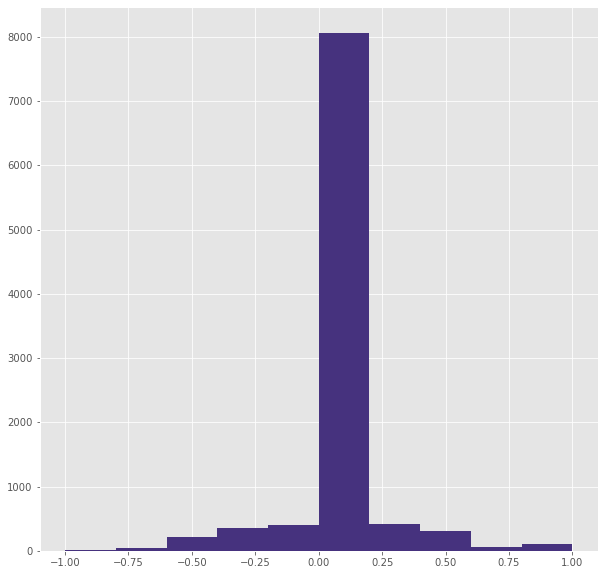

In [30]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

You can see that the polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are neutral. Let’s dig a bit deeper by classifying the news as negative, positive and neutral based on the scores.

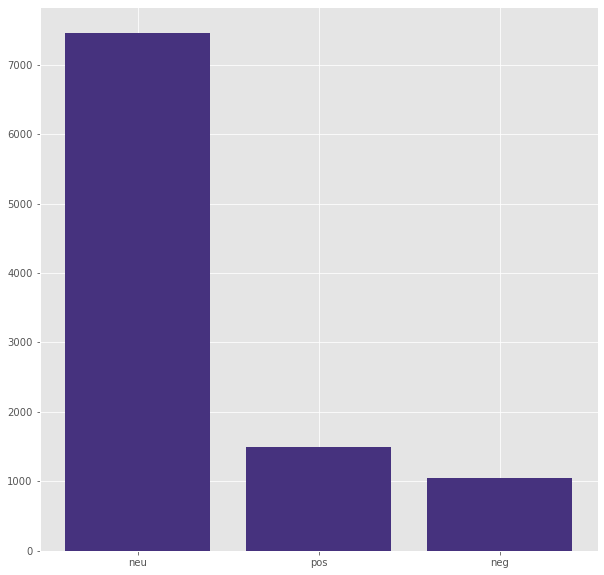

In [31]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

70 % of news is neutral with only 18% of positive and 11% of negative. Let’s take a look at some of the positive and negative headlines.

In [32]:
df1[df1['polarity']=='pos']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [33]:
df1[df1['polarity']=='neg']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object